In [1]:
# import libraries
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import re
import nltk
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [3]:
data=pd.read_csv("file.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
# data preprocessing

In [5]:
# Remove the 'Unnamed: 0' column

data = data[['tweets', 'labels']]

In [6]:
data['tweets'] = data['tweets'].astype(str)

tokens = data['tweets'].apply(lambda x: word_tokenize(x))
tokens

0         [ChatGPT, :, Optimizing, Language, Models, for...
1         [Try, talking, with, ChatGPT, ,, our, new, AI,...
2         [ChatGPT, :, Optimizing, Language, Models, for...
3         [THRILLED, to, share, that, ChatGPT, ,, our, n...
4         [As, of, 2, minutes, ago, ,, @, OpenAI, releas...
                                ...                        
219289    [Other, Software, Projects, Are, Now, Trying, ...
219290    [I, asked, #, ChatGPT, to, write, a, #, NYE, J...
219291    [chatgpt, is, being, disassembled, until, it, ...
219292    [2023, predictions, by, #, chatGPT, ., Nothing...
219293    [From, ChatGPT, ,, neat, stuff, https, :, //t....
Name: tweets, Length: 219294, dtype: object

In [7]:
from nltk.corpus import stopwords
import re
import string

# Remove the 'Unnamed: 0' column
data.drop('Unnamed: 0', axis=1, inplace=True)
stop_words = set(stopwords.words('english'))

def clean_text(text):
    cleaned_text = re.sub(r'http\S+|\\n|\s*#\S+|\s*@\S+|[^\w\s]', '', text)  # Removing links, hashtags, mentions, and special characters
    return cleaned_text.strip()  # Remove leading/trailing spaces

def process_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    clean_tokens = []
    for token in tokens:
        token = token.lower().strip(string.punctuation)  # Lowercase and strip punctuation
        if token and token not in stop_words:  # Check if token is not a stopword
            clean_tokens.append(token)
    cleaned_text = ' '.join(clean_tokens)  # Joining cleaned tokens
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)  # Remove remaining special characters
    return cleaned_text.strip()  # Remove leading/trailing spaces

data['cleaned_tweets'] = data['tweets'].apply(clean_text)  # Clean text
data['processed_tweets'] = data['cleaned_tweets'].apply(process_text)  # Process text for tokens, stopwords, and additional characters

In [ ]:
data.head()

,tweets,labels,cleaned_tweets,processed_tweets
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,ChatGPT Optimizing Language Models for Dialogue,chatgpt optimizing language models dialogue
1,"Try talking with ChatGPT, our new AI system wh...",good,Try talking with ChatGPT our new AI system whi...,try talking chatgpt new ai system optimized di...
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,ChatGPT Optimizing Language Models for Dialogu...,chatgpt optimizing language models dialogue ai...
3,"THRILLED to share that ChatGPT, our new model ...",good,THRILLED to share that ChatGPT our new model o...,thrilled share chatgpt new model optimized dia...
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,As of 2 minutes ago released their new ChatGPT...,2 minutes ago released new chatgpt use right


In [ ]:
# data visualization

In [ ]:
# Checking Labels

data['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
import plotly.express as px
labels = data['labels'].value_counts()
numbers = labels.index
quantity = labels.values
figure = px.pie(data, values = quantity,  names =  numbers, hole = 0.5)
figure.show()

In [ ]:
data['length'] = data['processed_tweets'].apply(lambda x: len(x))

In [ ]:
data.head()

,tweets,labels,cleaned_tweets,processed_tweets,length
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,ChatGPT Optimizing Language Models for Dialogue,chatgpt optimizing language models dialogue,43
1,"Try talking with ChatGPT, our new AI system wh...",good,Try talking with ChatGPT our new AI system whi...,try talking chatgpt new ai system optimized di...,77
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,ChatGPT Optimizing Language Models for Dialogu...,chatgpt optimizing language models dialogue ai...,131
3,"THRILLED to share that ChatGPT, our new model ...",good,THRILLED to share that ChatGPT our new model o...,thrilled share chatgpt new model optimized dia...,81
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,As of 2 minutes ago released their new ChatGPT...,2 minutes ago released new chatgpt use right,44


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Assuming 'tweets' is the column with text data and 'labels' is the target variable
X = data['processed_tweets']
y = data['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Encode the labels if they are not already numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and fit the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
predictions = nb.predict(X_test_tfidf)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6827789051277959


In [ ]:
# Generate and print the classification report
report = classification_report(y_test_encoded, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.98      0.79     21474
           1       0.78      0.61      0.68     11204
           2       0.67      0.19      0.30     11181

    accuracy                           0.68     43859
   macro avg       0.70      0.59      0.59     43859
weighted avg       0.69      0.68      0.63     43859



In [ ]:
cm = confusion_matrix(y_test_encoded, predictions)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[21041   256   177]
 [ 3569  6783   852]
 [ 7411  1648  2122]]


In [ ]:
# Assuming 'tweets' is the column with text data and 'labels' is the target variable
X = data['processed_tweets']
y = data['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Encode the labels if they are not already numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train_encoded)

# Get the best parameters and model
best_params = grid_search.best_params_
best_nb = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_nb.predict(X_test_tfidf)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7148133792380127


In [ ]:
# pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
data['processed_tweets']

0               chatgpt optimizing language models dialogue
1         try talking chatgpt new ai system optimized di...
2         chatgpt optimizing language models dialogue ai...
3         thrilled share chatgpt new model optimized dia...
4              2 minutes ago released new chatgpt use right
                                ...                        
219289           software projects trying replicate chatgpt
219290    asked write joke seos delivered seo make resol...
219291                       chatgpt disassembled dissemble
219292    2023 predictions nothing really specific trend...
219293                                   chatgpt neat stuff
Name: processed_tweets, Length: 219294, dtype: object

In [ ]:
tweeVal = data['processed_tweets'].values
tweeVal

array(['chatgpt optimizing language models dialogue',
       'try talking chatgpt new ai system optimized dialogue feedback help us improve',
       'chatgpt optimizing language models dialogue aiml article identified amp digested via granola machinedriven rss bot ramsey elbasheer',
       ..., 'chatgpt disassembled dissemble',
       '2023 predictions nothing really specific trends past years around topic see 364 days',
       'chatgpt neat stuff'], dtype=object)

In [ ]:
text = " ".join(token.lower() for list_token in tweeVal for token in list_token.split())
text

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from PIL import Image
import numpy as np

# Read the mask image
mask = np.array(Image.open("/content/twitter_mask.png"))

wordCloud = WordCloud(collocations=False,
                      background_color='white',
                      mask=mask,
                      contour_color='black',
                      contour_width=3).generate(text)

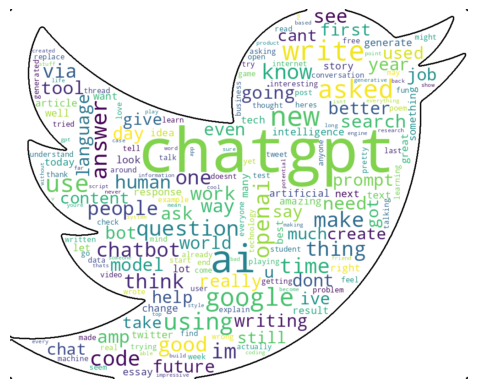

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()